## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# to list all the row and all the columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.shape

(284807, 31)

In [6]:
###Since PCA applied on the data already, the new variables were weighted combinations of the original features

In [7]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

 ### Since data is not havng nulls so we don't need to trean for missing data

### Since PCA applied on the data set, the new variables were weighted combinations of the original features

Here we will observe the distribution of our classes

In [8]:
#Describing data to see the range all variables to analyse the spread
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [10]:
print(classes)
print('Normal share', normal_share)
print('fraud_share', fraud_share)

0    284315
1       492
Name: Class, dtype: int64
Normal share 99.82725143693798
fraud_share 0.1727485630620034


In [11]:
## getting percentage of each class
percent = pd.Series([normal_share, fraud_share])
percent

0    99.827251
1     0.172749
dtype: float64

<AxesSubplot:title={'center':'Frequency by observation number'}, xlabel='Class', ylabel='Number of Observations'>

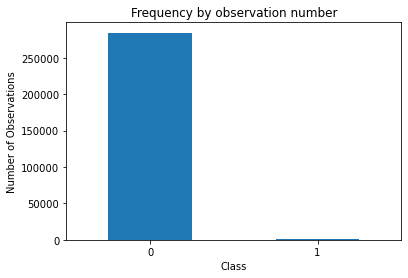

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# bar plot with default statistic=mean
\
plt.xlabel("Class")
plt.ylabel("Number of Observations")
classes.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

<AxesSubplot:title={'center':'% by observation number'}, xlabel='Class', ylabel='Perceent of Observations'>

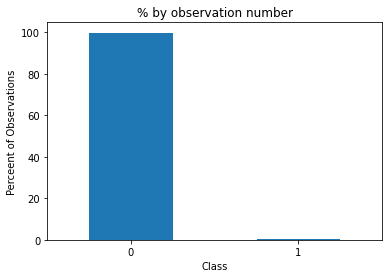

In [13]:
# bar plot with default statistic=mean
plt.xlabel("Class")
plt.ylabel("Perceent of Observations")
percent.plot(kind = 'bar',title = '% by observation number',rot=0)

### Create a scatter plot to observe the distribution of classes with time and Amount

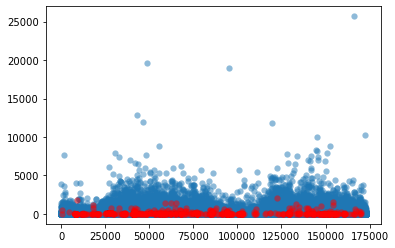

In [14]:
# Create a scatter plot to observe the distribution of classes (Fraud and Non fraud)
plt.scatter(df.loc[df['Class'] == 0]['Time'], df.loc[df['Class'] == 0]['Amount'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.loc[df['Class'] == 1]['Time'], df.loc[df['Class'] == 1]['Amount'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

#### Scatter plot analysis of Time and Amount shows that fraud is spread accroass all time but for less amount of transactions

### Ploting the distribution of 'Time'  and Amount feature 

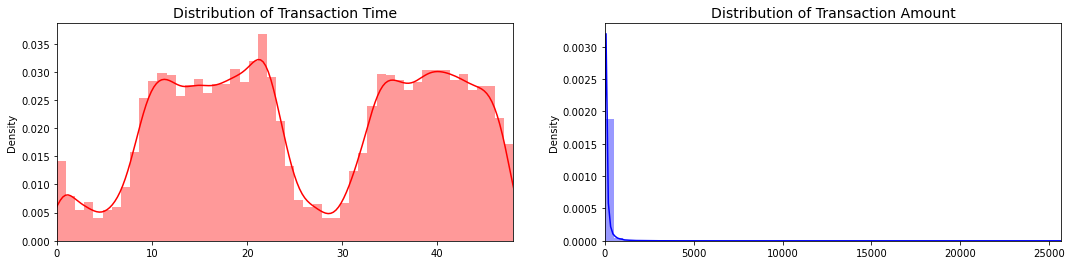

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))


sns.distplot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])
sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

In [16]:
# Seperate total data into non-fraud and fraud cases
df_nonfraud = df[df.Class == 0] #save non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds

In [17]:
y= df['Class']#class variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [18]:
X = df.drop(['Class'], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

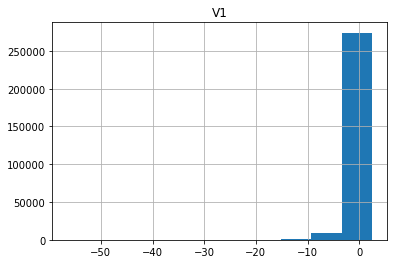

In [22]:
# plot the histogram of a variable from the dataset to see the skewness
df.hist(column='V1')
plt.show()

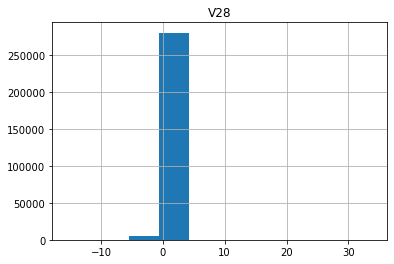

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
df.hist(column='V28')
plt.show()

### There is skewness present in the distribution of variables for almost all the variables as per Histogram
### The histohram show distribution of V1 and V28

### Since we want to make data more gausian and data has negative and positive both values, using 'yeo-johnson' method to scale the variables

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [25]:
import sklearn
from sklearn.preprocessing import PowerTransformer


In [26]:
pt = sklearn.preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

In [27]:
col_list = df.columns
col_list

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [28]:
df_transformed = pt.fit_transform(df.values)

In [29]:
df1 = pd.DataFrame(df_transformed, columns=col_list)
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.434947,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,1.119013,-0.041599
1,-2.434947,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-1.128464,-0.041599
2,-2.434688,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.623286,-0.041599
3,-2.434688,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.012504,-0.041599
4,-2.434458,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.692981,-0.041599


In [30]:
# plot the histogram of a variable from the dataset again to see the result 


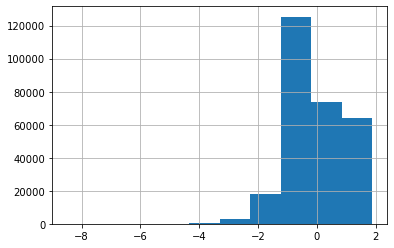

In [31]:
# plot the histogram of a variable from the dataset to see the skewness
df1['V1'].hist()
plt.show()

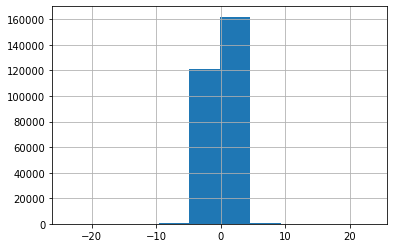

In [32]:
# plot the histogram of a variable from the dataset to see the skewness
df1['V2'].hist()
plt.show()

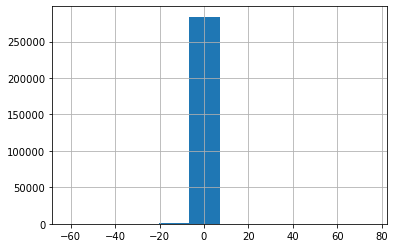

In [33]:
# plot the histogram of a variable from the dataset to see the skewness
df1['V28'].hist()
plt.show()

### After performing PowerTransformer, data is more gausian as per hist diagram for 3 variable

In [34]:
#Creating new X variable,\
X = df1.drop(['Class'], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.434947,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,1.119013
1,-2.434947,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-1.128464
2,-2.434688,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.623286
3,-2.434688,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.012504
4,-2.434458,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.692981


In [35]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [37]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


## Model Building
- Build different models on the imbalanced dataset and see the result

In [38]:
# Logistic Regression
from sklearn import linear_model #import the package
# Initial model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [39]:
logisticRegr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
predictions = logisticRegr.predict(X_test)

In [41]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9991924440855307


### Looking at other metrices to see if model's performance is good

In [42]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[85280    21]
 [   48    94]]


In [43]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logisticRegr.predict(X_test))

In [44]:
roc

0.8308628219770552

In [45]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, logisticRegr.predict(X_test))

In [46]:
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85301\n           1       0.82      0.66      0.73       142\n\n   micro avg       1.00      1.00      1.00     85443\n   macro avg       0.91      0.83      0.87     85443\nweighted avg       1.00      1.00      1.00     85443\n'

### Performing cross validation

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logisticRegr, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.99944826 0.99929779 0.99934795 0.99919747 0.99914727 0.99929775
 0.99939807 0.99924759 0.99944823 0.99934791]


In [48]:
num_C =  10e-2 #--> list of values
cv_num = 5  #--> list of values for cross validation

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso


In [50]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### The Regularization and Cross validation shows that train and test score both increasing with alpha and mean score value is continiously decreasing

In [51]:
# Lasso regression:
params={'alpha':[0,0.00001,0.0001,0.0005,.01,.05,0.1,0.5,1,5,10,50,100,200,500]}
lasso=Lasso()
folds=cv_num
model_cv_lasso=GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 1e-05, 0.0001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [52]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.198651,0.097076,0.003124,0.006248,0,{'alpha': 0},-0.004996,-0.004819,-0.004927,-0.004792,-0.004744,-0.004856,0.000093,15,-0.004855,-0.004853,-0.004695,-0.004905,-0.004944,-0.004851,0.000085
1,0.292775,0.007099,0.003124,0.006249,1e-05,{'alpha': 1e-05},-0.004987,-0.004811,-0.004919,-0.004784,-0.004735,-0.004847,0.000092,14,-0.004847,-0.004845,-0.004686,-0.004896,-0.004936,-0.004842,0.000085
2,0.244060,0.012241,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.004915,-0.004751,-0.004853,-0.004722,-0.004672,-0.004783,0.000089,13,-0.004781,-0.004783,-0.004618,-0.004834,-0.004873,-0.004778,0.000087
3,0.196827,0.007662,0.000000,0.000000,0.0005,{'alpha': 0.0005},-0.004821,-0.004704,-0.004804,-0.004644,-0.004630,-0.004721,0.000080,12,-0.004709,-0.004731,-0.004568,-0.004753,-0.004822,-0.004717,0.000083
4,0.110660,0.002618,0.006245,0.007648,0.01,{'alpha': 0.01},-0.003711,-0.003694,-0.003996,-0.003687,-0.003795,-0.003777,0.000116,11,-0.003459,-0.003733,-0.003706,-0.003883,-0.004094,-0.003775,0.000210
5,0.099973,0.007654,0.000000,0.000000,0.05,{'alpha': 0.05},-0.003655,-0.003486,-0.003674,-0.003393,-0.003318,-0.003505,0.000141,1,-0.003405,-0.003518,-0.003393,-0.003580,-0.003630,-0.003505,0.000094
6,0.096850,0.006249,0.006247,0.007651,0.1,{'alpha': 0.1},-0.003655,-0.003486,-0.003674,-0.003393,-0.003318,-0.003505,0.000141,1,-0.003405,-0.003518,-0.003393,-0.003580,-0.003630,-0.003505,0.000094
7,0.096857,0.006247,0.006243,0.007646,0.5,{'alpha': 0.5},-0.003655,-0.003486,-0.003674,-0.003393,-0.003318,-0.003505,0.000141,1,-0.003405,-0.003518,-0.003393,-0.003580,-0.003630,-0.003505,0.000094
8,0.099978,0.007650,0.003124,0.006248,1,{'alpha': 1},-0.003655,-0.003486,-0.003674,-0.003393,-0.003318,-0.003505,0.000141,1,-0.003405,-0.003518,-0.003393,-0.003580,-0.003630,-0.003505,0.000094
9,0.095127,0.002129,0.003124,0.006247,5,{'alpha': 5},-0.003655,-0.003486,-0.003674,-0.003393,-0.003318,-0.003505,0.000141,1,-0.003405,-0.003518,-0.003393,-0.003580,-0.003630,-0.003505,0.000094


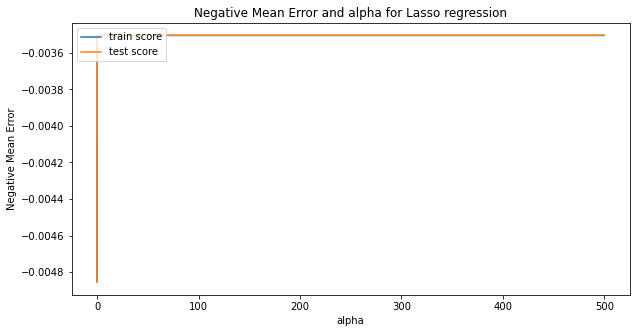

In [53]:
plt.figure(figsize=(10,5))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')
plt.title("Negative Mean Error and alpha for Lasso regression")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [54]:
# Lasso regression model evaluation with alpha=100:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_ 

array([-0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
        0.,  0.,  0., -0.])

In [55]:
lasso_coef=pd.DataFrame(lasso.coef_,index=X_train.columns)
lasso_coef.rename(columns={0:'Coef'},inplace=True)

In [56]:
#sorting the lasso coefficients dataframe:
lasso_coef.iloc[(-lasso_coef['Coef'].abs()).argsort]

,Coef
Time,-0.0
V27,0.0
V26,0.0
V25,0.0
V24,-0.0
V23,0.0
V22,-0.0
V21,0.0
V20,0.0
V19,0.0


In [57]:
from sklearn.metrics import r2_score
y_train_pred=(lasso.predict(X_train))
r2_score(y_train,y_train_pred)

0.0

### Regularization of model does not provide any good result 

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [58]:
### Tying KNN model

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train,y_train)
print("classifier created")
score = knn.score(X_test,y_test)
print("model evaluated")
print(score)

classifier created
model evaluated
0.9993679997191109


### KNN model performance is resonably good compared to Logistic regression 

### SVM model

In [61]:
# show the dimensions of the train/test data
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (199364, 30)
X_test.shape:  (85443, 30)
y_train.shape:  (199364,)
y_test.shape:  (85443,)


In [62]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [63]:
from sklearn.svm import LinearSVC, SVC
#LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))
clf = svm.SVC(C= 1, kernel= 'linear', probability=True,  random_state= 0)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#Predict the class using X_test
y_pred = clf.predict(X_test)


print(" *****************   Printing Evaluation in next step")#print the evaluation score on the X_test by choosing the best evaluation metric

 *****************   Printing Evaluation in next step


In [65]:
features_names = X_train.columns
features_names
#feature_importances = []
#feature_importances.append((clf, clf, clf.feature_importances))
#clf.feature_importances_(svm.coef_, features_names)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [66]:
# features_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# svm = svm.SVC(kernel='linear')
# svm.fit(X_train, y_train)
# f_importances(svm.coef_, features_names)
# f_importances

NameError: name 'f_importances' is not defined

In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))
print("Average precision-recall score RF: {}".format(average_precision))
print(con_mat)
print(cls_report)

In [ ]:
pip install scikit-learn==0.20.4

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [67]:
from sklearn.svm import LinearSVC, SVC
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

AttributeError: 'SVC' object has no attribute 'feature_importances_'

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [80]:
# Balancing the classes using Random Sampling
print(df.shape)

(284807, 31)


In [81]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Since Amount column is already transformed using Power transform so no need to transform agai

In [71]:
X['Time'].describe()

count    2.848070e+05
mean    -2.235360e-16
std      1.000002e+00
min     -2.434947e+00
25%     -8.096432e-01
50%     -1.427109e-01
75%      9.285190e-01
max      1.535312e+00
Name: Time, dtype: float64

### Since transformed Time variable is not indicative enough so dropping this 

In [82]:
from sklearn.preprocessing import StandardScaler

In [85]:
# Tranforming Amount to New amount by scalling the Amount
df['new_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,new_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Balancing the class so that there is 50% records from each class

In [86]:
# Rebalancing
train_set_percentage = 0.5

# select 50% of the entire class 1 (fraudulent transactions) data in order to train the model 
fraud_series = df[df['Class'] == 1]
idx = fraud_series.index.values
np.random.shuffle(idx)
fraud_series.drop(idx[:int(idx.shape[0]*train_set_percentage)], inplace=True)
df.drop(fraud_series.index.values, inplace=True)


In [90]:
# normal dataset with the same size of the fraud_series (training dataset)
normal_series = df[df['Class'] == 0] 
idx = normal_series.index.values
np.random.shuffle(idx)
normal_series.drop(idx[fraud_series.shape[0]:], inplace=True)
df.drop(normal_series.index.values, inplace=True)

### The Rebalancing act was done using fraud series and normal series

In [91]:
# build the training dataset
new_dataset = pd.concat([normal_series, fraud_series])
new_dataset.reset_index(inplace=True, drop=True)
y = new_dataset['Class'].values.reshape(-1, 1)
new_dataset.drop(['Class'], axis=1, inplace=True)
X = new_dataset

In [92]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,new_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


### Using SVN to create and test the model with Rebalanced data 

In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
# Attributes that will be used by the gridsearchCV algorithm 
attr={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
      'gamma': [1e-1, 1e-2, 1e-3]
     }

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=10)

model = SVC()
classif = GridSearchCV(model, attr, cv=5)
classif.fit(X_train, y_train)
y_pred = classif.predict(X_test)
print('Accuracy: ',accuracy_score(y_pred, y_test))

Accuracy:  0.972972972972973


### We have reached good accuracy of model when balance classes are used as input

In [96]:
y_all = df['Class'].values.reshape(-1, 1)
df.drop(['Class'], axis=1, inplace=True)
X_all = df
y_pred_all = classif.predict(X_all)
print(confusion_matrix(y_all, y_pred_all))

[[241224  42845]
 [    15    231]]


In [97]:
print(recall_score(y_all, y_pred_all))

0.9390243902439024


### Recall value is indicator that our model performing well

## Note that X_train, X_test, y_train, y_test used abouve is Rebalanced data, and not original data

### Using Logistic reg again with Rebalanced data

In [98]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {'alpha':[0,0.00001,.01,.05,0.1,0.5,5,10,100,]}  #--> list of values
cv_num = 5  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [101]:
params=num_C
lasso=Lasso()
folds=cv_num
model_cv_lasso_new=GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv_lasso_new.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 1e-05, 0.0001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [102]:
cv_results_lasso = pd.DataFrame(model_cv_lasso_new.cv_results_)
cv_results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025533,3.200558e-03,0.000991,0.000620,0,{'alpha': 0},-0.178377,-0.227993,-0.194300,-0.187288,-0.204130,-0.198401,0.017050,4,-0.182366,-0.164978,-0.171931,-0.178390,-0.169543,-0.173442,0.006217
1,0.017752,2.308973e-03,0.000599,0.000489,1e-05,{'alpha': 1e-05},-0.178341,-0.227986,-0.194297,-0.187262,-0.204115,-0.198383,0.017059,3,-0.182366,-0.164980,-0.171931,-0.178394,-0.169546,-0.173443,0.006216
2,0.014570,2.406625e-03,0.000807,0.000404,0.0001,{'alpha': 0.0001},-0.178018,-0.227923,-0.194303,-0.187107,-0.203972,-0.198248,0.017124,2,-0.182364,-0.165005,-0.171932,-0.178419,-0.169574,-0.173459,0.006210
3,0.010766,1.328667e-03,0.000605,0.000494,0.0005,{'alpha': 0.0005},-0.176463,-0.227723,-0.194525,-0.186617,-0.203339,-0.197717,0.017441,1,-0.182361,-0.165118,-0.171958,-0.178531,-0.169700,-0.173534,0.006179
4,0.005197,1.325181e-03,0.000793,0.000397,0.01,{'alpha': 0.01},-0.184926,-0.227155,-0.202058,-0.186434,-0.202281,-0.200566,0.015230,5,-0.191088,-0.173539,-0.181225,-0.187581,-0.178391,-0.182365,0.006297
5,0.001999,1.435953e-05,0.000600,0.000490,0.05,{'alpha': 0.05},-0.230654,-0.270977,-0.242424,-0.230864,-0.221764,-0.239387,0.017125,6,-0.235334,-0.214497,-0.223982,-0.229870,-0.226796,-0.226096,0.006915
6,0.001976,1.499132e-03,0.000593,0.000484,0.1,{'alpha': 0.1},-0.256557,-0.296530,-0.280055,-0.250336,-0.248826,-0.266512,0.018754,7,-0.265163,-0.246887,-0.258875,-0.260728,-0.261680,-0.258667,0.006234
7,0.000997,9.536743e-08,0.000399,0.000489,0.5,{'alpha': 0.5},-0.321046,-0.322983,-0.353699,-0.318747,-0.319848,-0.327286,0.013305,8,-0.327181,-0.311228,-0.317508,-0.329919,-0.332596,-0.323686,0.008048
8,0.000997,2.336015e-07,0.000399,0.000489,1,{'alpha': 1},-0.396107,-0.381543,-0.414344,-0.402928,-0.398279,-0.398641,0.010635,9,-0.400027,-0.393754,-0.386193,-0.399519,-0.401908,-0.396280,0.005733
9,0.000997,1.507891e-07,0.000199,0.000399,5,{'alpha': 5},-0.505507,-0.504032,-0.500237,-0.500237,-0.499574,-0.501924,0.002387,10,-0.497613,-0.499464,-0.499464,-0.499464,-0.499895,-0.499180,0.000801


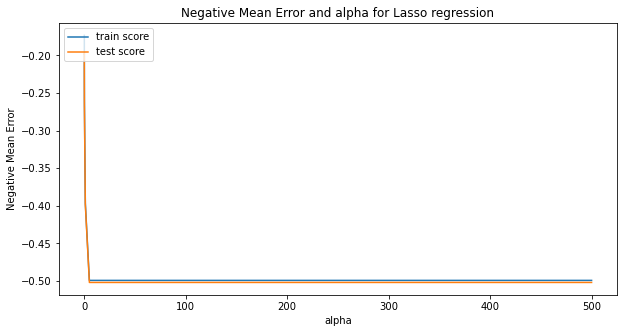

In [103]:
# Plotting to see the results

plt.figure(figsize=(10,5))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')
plt.title("Negative Mean Error and alpha for Lasso regression")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### This show test and train has very close error term and its shows stanle model

In [105]:
# fitting the model
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
from sklearn.metrics import r2_score
y_train_pred=(lasso.predict(X_train))
r2_score(y_train,y_train_pred)

0.3332791473909067

### Result shows better model performance after rebalancing data

In [109]:
#!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.7.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: None
Author-email: None
License: MIT
Location: c:\dev\python\lib\site-packages
Requires: scikit-learn, joblib, scipy, numpy
Required-by: imblearn


In [1]:
from imblearn.over_sampling import SMOTE

### Reimporting data aagain to not modify anything done in previous models

### Random Oversampling

In [2]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [6]:
df2 = pd.read_csv('data/creditcard.csv')
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [8]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df2['scaled_amount'] = RobustScaler().fit_transform(df2['Amount'].values.reshape(-1,1))
df2['scaled_time'] = RobustScaler().fit_transform(df2['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df2.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [26]:
df_scaled.shape

(284807, 31)

In [27]:
cols = df_scaled.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [29]:
#removing class
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 
       'scaled_amount', 'scaled_time']

In [9]:
# Define the prep_data function to extrac features 
def prep_data(df):
    X = df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function 
X, y = prep_data(df_scaled)

In [10]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

### Print the class distribution after applying SMOTE 

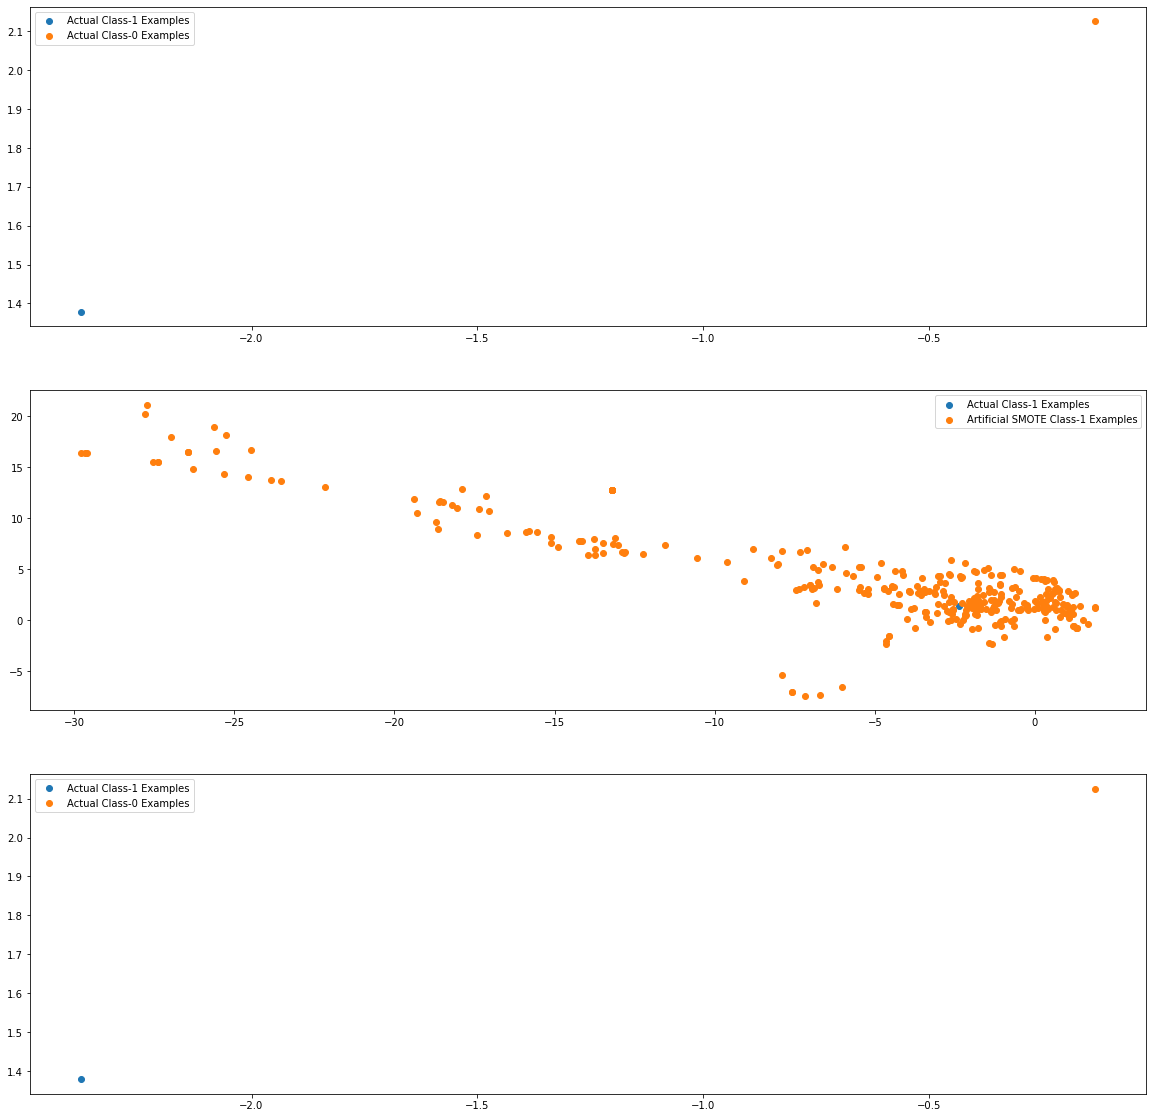

In [62]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

### additinal code added to make code for plotting work
#Transforming 1D array to 2D array since code provided for plotting needes 2D array
X_train_1_t=np.reshape(X_train_1, (1, X_train_1.size))
X_train_0_t=np.reshape(X_train_0, (1, X_train_0.size))

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1_t[:X_train_1.shape[0], 0], X_train_1_t[:X_train_1.shape[0], 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0_t[:X_train_1.shape[0], 0], X_train_0_t[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0_t[:X_train_1.shape[0], 0], X_train_0_t[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [22]:
X_train_smote

array([[-1.32066260e-01,  1.07043551e-01, -6.50588173e-01, ...,
         7.48169663e-02,  3.61769021e-01,  3.43389842e-01],
       [ 2.12599441e+00,  1.42074055e-02, -1.51476031e+00, ...,
        -5.76775883e-02, -2.79745686e-01,  5.94779074e-01],
       [-8.66939700e-02,  1.66240223e-01,  1.57312700e+00, ...,
        -1.13993068e+00,  2.06944736e+00,  4.79399429e-01],
       ...,
       [-9.67834510e-01,  3.54676919e+00, -6.53587566e+00, ...,
         5.57450623e-01, -9.52189348e-02,  7.45509493e-01],
       [-7.08473171e-01, -1.41432986e+00, -1.08319770e+00, ...,
        -2.64757694e-02,  8.40884743e+00, -2.66041686e-01],
       [-2.75808306e+01,  1.54584402e+01, -2.87055960e+01, ...,
         3.90716263e-01,  1.08977852e+00, -6.60952467e-01]])

In [30]:
X_train_smote = pd.DataFrame(data=X_train_smote,columns=cols)
X_train_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,0.361769,0.343390
1,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.279746,0.594779
2,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,2.069447,0.479399
3,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.224132,-0.601182
4,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.949486,0.710300


In [31]:
y_train_smote = pd.DataFrame(data=y_train_smote,columns=['Class'])
y_train_smote.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [32]:
y_train_smote.Class.value_counts()

1.0    199019
0.0    199019
Name: Class, dtype: int64

### Here we reached to balanced data using SMOTE

### Creating Logistic regression model using balanced data from SMOTE

In [33]:
#fitting the linear Regression model
lr_smote = LogisticRegression(random_state = 42)
lr_smote.fit(X_train_smote,y_train_smote)

LogisticRegression(random_state=42)

In [34]:
#accuracy score of linear regression model
lr_smote.score(X_train_smote,y_train_smote)

0.9460051552866812

In [38]:
# prediction on test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support

y_pred = lr_smote.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr_smote.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[83226  2070]
 [   12   135]]
Sensitivity: 	0.92
Specificity: 	0.98
AUC:    	 0.98


### The resultant output from SMOTE has provided significant improvement to data


### Model output is quite good, Sensitivity: 	0.92., Specificity: 	0.98 , AUC:    	 0.98

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [44]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]





In [55]:
#Transforming 1D array to 2D array since code provided for plotting needes 2D array
X_train_1_t=np.reshape(X_train_1, (1, X_train_1.size))
X_train_0_t=np.reshape(X_train_0, (1, X_train_0.size))

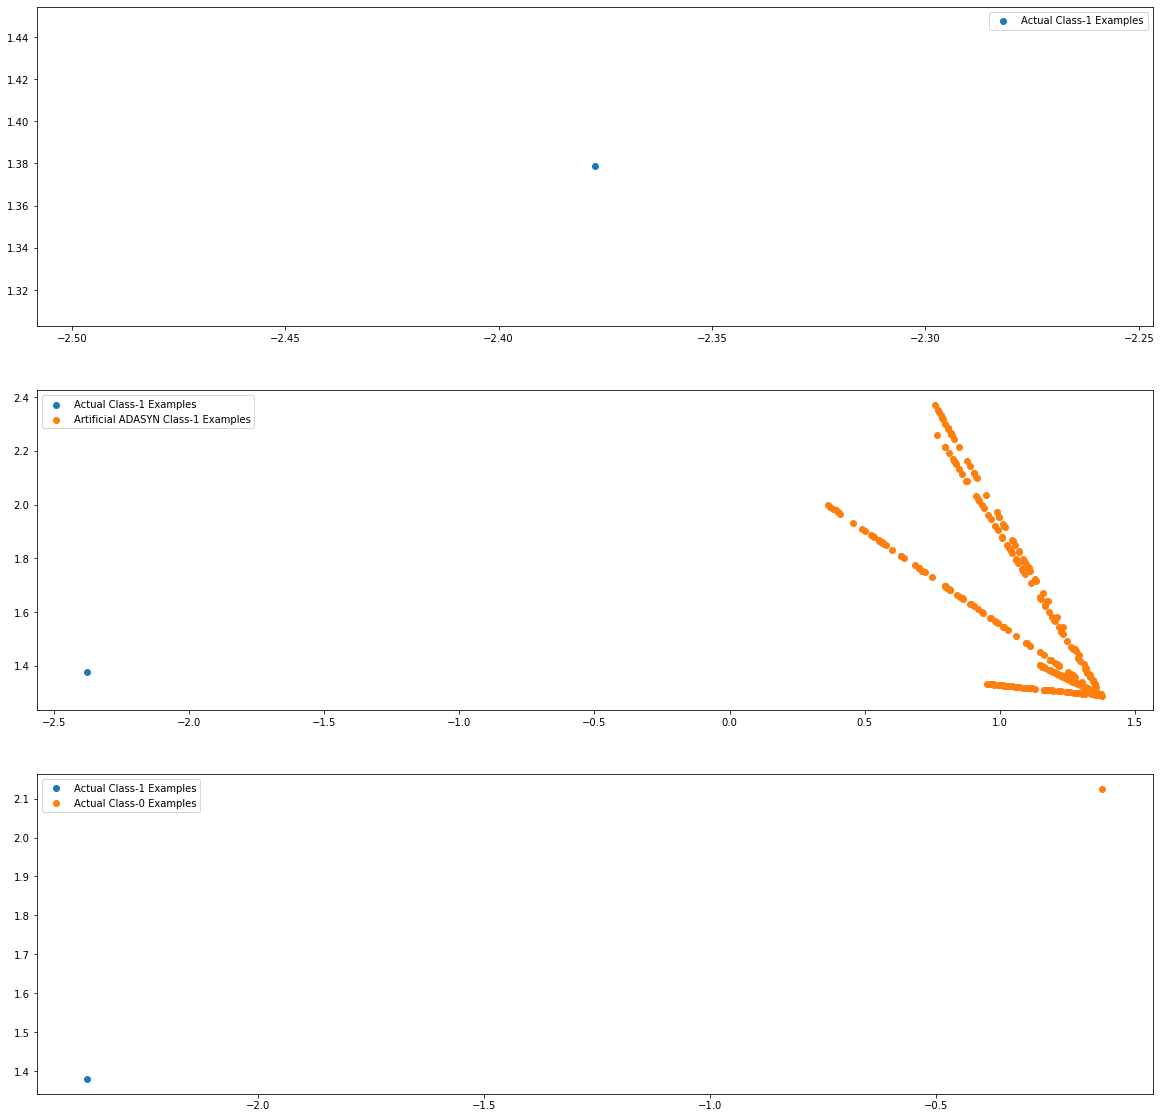

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0_t[:X_train_1_t.shape[0], 0], X_train_0_t[:X_train_1_t.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


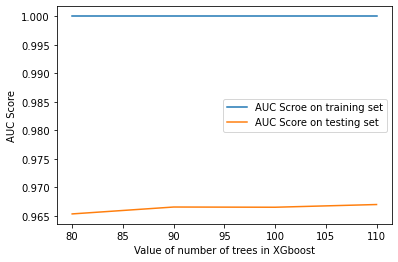

In [64]:
from xgboost import XGBClassifier
tree_range = range(80, 120, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_smote,y_train_smote)
    y_pred_prob = xgb.predict_proba(X_train_smote)[:, 1]
    score1.append(roc_auc_score(y_train_smote, y_pred_prob))
    y_pred_prob1 = xgb.predict_proba(X_test)[:, 1]
    score2.append(roc_auc_score(y_test, y_pred_prob1))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'AUC Scroe on training set')
plt.plot(tree_range,score2,label= 'AUC Score on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('AUC Score')
plt.legend()

In [65]:
xgb = XGBClassifier(n_estimators=100,random_state=4,)
xgb.fit(X_train_smote, y_train_smote)
# predict churn on test data
y_test_pred = xgb.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85264    32]
 [   24   123]]
Sensitivity: 	0.84
Specificity: 	1.0
AUC:    	 0.97


### XG boost algo provided decently good result

### XGBoost perform better due to slightly high AUC Score and higher Specificity

### XGB results are Sensitivity: 	0.84, Specificity: 	1.0, AUC:    	 0.97

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# rfrom sklearn.model_selection import GridSearchCVandom forest
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 'sqrt']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model_smote = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [70]:
# fit model
rf_model_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt']},
             scoring='roc_auc', verbose=1)

In [71]:
 # print best hyperparameters
print("Best AUC: ", rf_model_smote.best_score_)
print("Best hyperparameters: ", rf_model_smote.best_params_)

Best AUC:  0.9999994924048187
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'sqrt'}


In [72]:
rf_model_smote.score(X_train_smote,y_train_smote)

1.0

In [73]:
# predict churn on test data
y_test_pred = rf_model_smote.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model_smote.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85285    11]
 [   25   122]]
Sensitivity: 	0.83
Specificity: 	1.0
AUC:    	 0.96


### Random Forest too provides similiar result as XGBoost

### RF's performance stats are Sensitivity: 	0.83, Specificity: 	1.0, AUC:    	 0.96

##### Build models on other algorithms to see the better performing on ADASYN

## Adasyn Oversampling

In [102]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended

X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]





In [77]:
#Transforming 1D array to 2D array since code provided for plotting needes 2D array
X_train_1_t=np.reshape(X_train_1, (1, X_train_1.size))
X_train_0_t=np.reshape(X_train_0, (1, X_train_0.size))

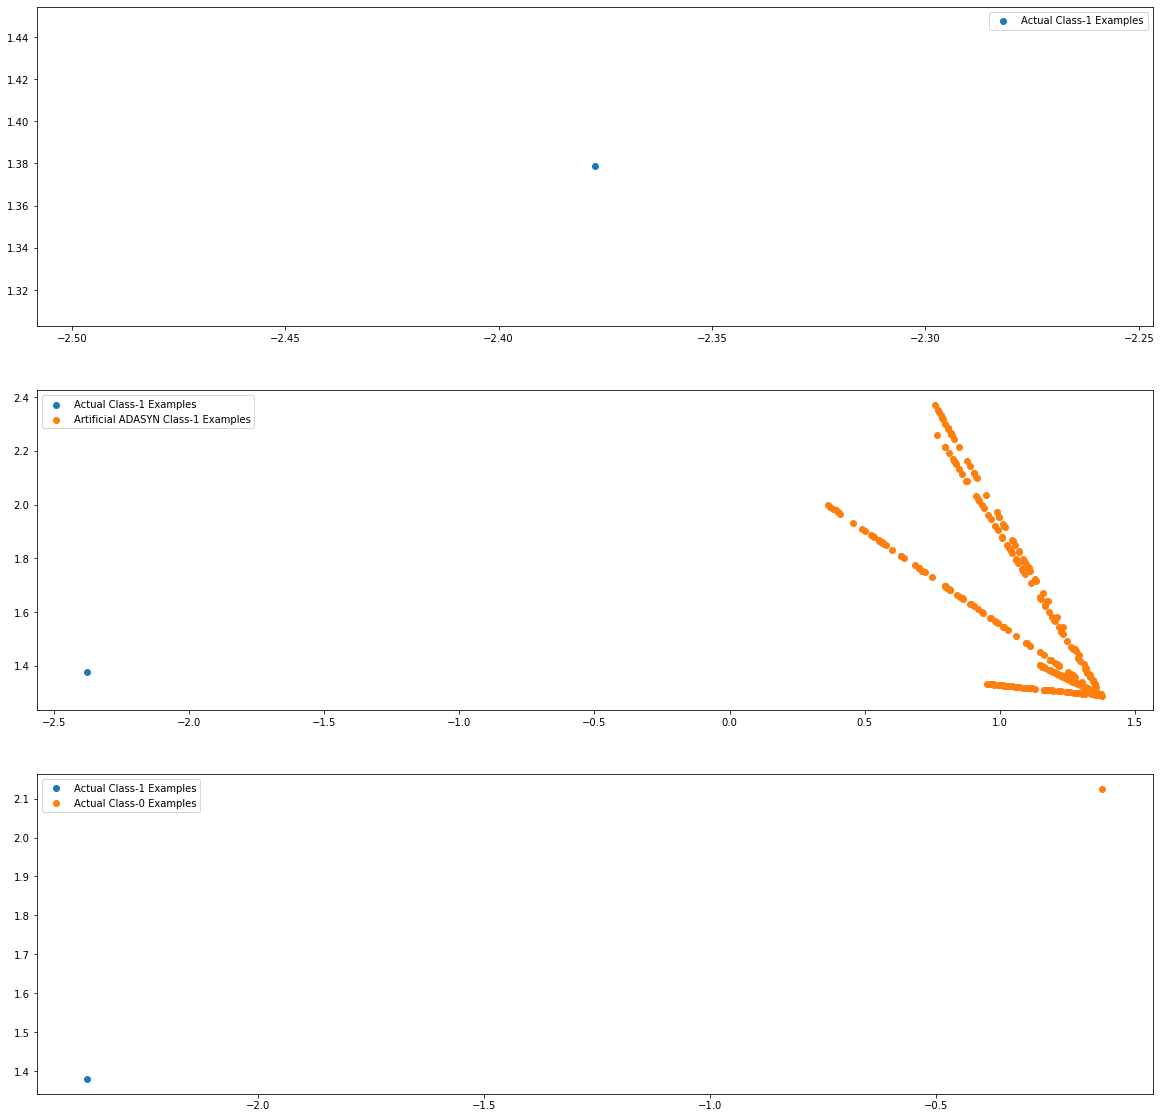

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1_t[:, 0], X_train_1_t[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0_t[:X_train_1.shape[0], 0], X_train_0_t[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [79]:
X_train_adasyn = pd.DataFrame(data=X_train_adasyn,columns=cols)
X_train_adasyn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,0.361769,0.343390
1,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.279746,0.594779
2,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,2.069447,0.479399
3,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.224132,-0.601182
4,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.949486,0.710300


In [80]:
y_train_adasyn = pd.DataFrame(data=y_train_adasyn,columns=['Class'])
y_train_adasyn.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [81]:
y_train_adasyn.Class.value_counts()

0.0    199019
1.0    198978
Name: Class, dtype: int64

ADASYN oversampled data around a specific region where there was low density of class 1

### Model Building on ADASYN oversampled Data

## Logistic regression

In [82]:
#fitting the linear Regression model
lr_adasyn = LogisticRegression(random_state = 42)
lr_adasyn.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(random_state=42)

In [83]:
#accuracy score of linear regression model
lr_adasyn.score(X_train_adasyn,y_train_adasyn)

0.8981349105646524

In [84]:
# predict churn on test data
y_pred = lr_adasyn.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = lr_adasyn.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[78131  7165]
 [    8   139]]
Sensitivity: 	0.95
Specificity: 	0.92
AUC:    	 0.98


In [85]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model_adasyn = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [86]:
# fit model
model_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [87]:
# cross validation results
pd.DataFrame(model_adasyn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.321893,0.020885,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,18.607079,1.032410,0.142787,0.009150,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.967187,0.967988,0.966724,0.967539,0.967393,0.967366,0.000415,8
2,0.392223,0.033812,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,20.646972,1.129503,0.139579,0.020988,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.967251,0.968059,0.966781,0.967602,0.967454,0.967430,0.000419,7
4,0.365179,0.011982,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,20.142007,1.412952,0.128373,0.018651,1,l2,"{'C': 1, 'penalty': 'l2'}",0.967259,0.968068,0.966788,0.967610,0.967463,0.967438,0.000420,6
6,0.369155,0.023206,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,19.779053,1.872539,0.123913,0.010104,2,l2,"{'C': 2, 'penalty': 'l2'}",0.967263,0.968072,0.966792,0.967614,0.967466,0.967442,0.000420,5
8,0.366512,0.023796,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,18.595159,0.775499,0.133082,0.014311,3,l2,"{'C': 3, 'penalty': 'l2'}",0.967263,0.968073,0.966793,0.967616,0.967468,0.967443,0.000420,4


In [88]:
# print best hyperparameters
print("Best AUC: ", model_adasyn.best_score_)
print("Best hyperparameters: ", model_adasyn.best_params_)

Best AUC:  0.9674447997803375
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [89]:
# predict churn on test data
y_pred = model_adasyn.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_adasyn.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[78132  7164]
 [    8   139]]
Sensitivity: 	0.95
Specificity: 	0.92
AUC:    	 0.98


In [90]:
# accuracy score with turen parameters
model_adasyn.score(X_test,y_test)

0.9837642616603949

### Modeling on ADASYN oversampled Data improved the model results 

### Best hyperparameters:  {'C': 10, 'penalty': 'l2'}, Sensitivity: 	0.95, Specificity: 	0.92, AUC:    	 0.98

### Random Forest

In [91]:
# random forest
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 'sqrt']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model_adasyn = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [92]:
# fit model
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt']},
             scoring='roc_auc', verbose=1)

In [93]:
# print best hyperparameters
print("Best AUC: ", rf_model_adasyn.best_score_)
print("Best hyperparameters: ", rf_model_adasyn.best_params_)

Best AUC:  0.9999997630053514
Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [94]:
# accuracy score with turen parameters
rf_model_adasyn.score(X_test,y_test)

0.967054025230426

In [95]:
rf_model_adasyn = RandomForestClassifier(n_jobs = -1, criterion='entropy', max_features='auto')

In [96]:
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

In [97]:
# predict churn on test data
y_test_pred = rf_model_adasyn.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model_adasyn.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85285    11]
 [   29   118]]
Sensitivity: 	0.8
Specificity: 	1.0
AUC:    	 0.97


### RF Modeling on ADASYN oversampled Data 

#### Model performance on test data is Sensitivity: 	0.8, Specificity: 	1.0, AUC:    	 0.97

## Results are not better compared to Logistic Reg

### XGBoost Modeling on ADASYN oversampled Data

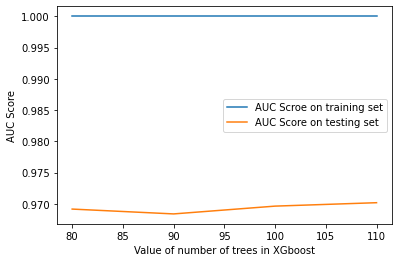

In [103]:
tree_range = range(80, 120, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_adasyn,y_train_adasyn)
    y_pred_prob = xgb.predict_proba(X_train_adasyn)[:, 1]
    score1.append(roc_auc_score(y_train_adasyn, y_pred_prob))
    y_pred_prob1 = xgb.predict_proba(X_test)[:, 1]
    score2.append(roc_auc_score(y_test, y_pred_prob1))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'AUC Scroe on training set')
plt.plot(tree_range,score2,label= 'AUC Score on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('AUC Score')
plt.legend()

In [104]:
xgb = XGBClassifier(n_estimators=100,random_state=4)
xgb.fit(X_train_adasyn, y_train_adasyn)
# predict churn on test data
y_test_pred = xgb.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85253    43]
 [   28   119]]
Sensitivity: 	0.81
Specificity: 	1.0
AUC:    	 0.97


### XGB Modeling on ADASYN oversampled Data Model performance on test data is Sensitivity: 	0.81, Specificity: 	1.0, AUC:    	 0.97

### Results are not better compared to Logistic Reg

In [ ]:
#### Test data predisction provides better result with Adasyn 

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [108]:
# perform the best oversampling method on X_train & y_train

clf = lr_adasyn  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn,y_train_adasyn) # fit on the balanced dataset
clf.score(X_train_adasyn,y_train_adasyn)
#print(acu) --> #print the evaluation score on the X_test by choosing the best evaluation metric
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


Sensitivity: 	0.95
Specificity: 	0.92


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


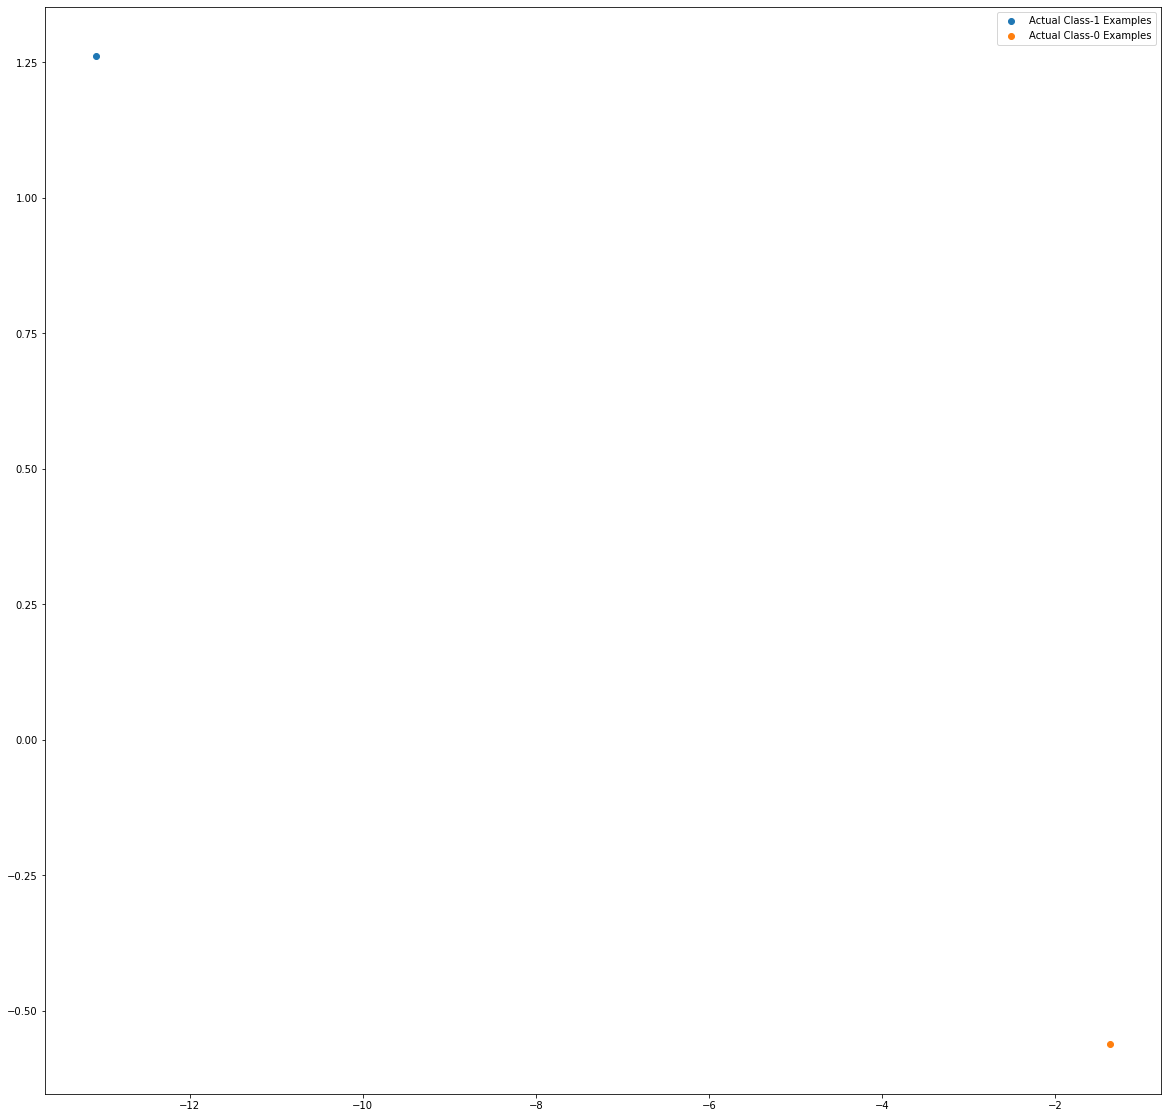

In [113]:
var_imp = []
for i in xgb.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

#Transforming 1D array to 2D array since code provided for plotting needes 2D array
X_train_1_t=np.reshape(X_train_1, (1, X_train_1.size))
X_train_0_t=np.reshape(X_train_0, (1, X_train_0.size))

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1_t[:, top_var_index], X_train_1_t[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0_t[:X_train_1.shape[0], top_var_index], X_train_0_t[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Due to PCA we can't explain variables but model shows Top var = 14, 2nd Top var = 4, 3rd Top var = 8

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [110]:
from sklearn import metrics
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, xgb.predict_proba(X_train_adasyn)[:, 1]))
print('Test auc =', metrics.roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold = ',threshold)

Train auc = 1.0
Test auc = 0.9696356314050663
Best Threshold =  0.0010143361


## Final model using Adasyn data with logistic moddel given very good result

## RG and XGB as well produced very close the best model on adasyn and SMOTE balancing data

## Final Verdict: 

### 1. Models after class rebalancing provide a lot better result than original data

### 2. Adasyn Over samling provided slightly better result than SMOTE rebalancing

### 3. Random Forest, XGBOOST and Logistic regression's performance is not very diverget so for simplicity, Logistic refression can be better option

### Due to PCA done on source data, explainability is lost but given original data, Adasyn oversampling and logistic regression is best option